In [72]:
#math and statistics.
from scipy import stats
import statistics
import math

#impot matplot and seaborn for viz.
import matplotlib.pyplot as plt
import seaborn as sns

#numpy and pandas library
import numpy as np
import pandas as pd

#dataset library
from pydataset import data
import env
import acquire


import warnings 
warnings.filterwarnings("ignore")

## Data exploration three different primary ways: 
1. Univeritate Exploraton: 
    - One variable exploration: 
    - Things we do with a signgle series: Box/Whisker plots, histogram, value_counts 
2. Biveriate Exploration: 
    - Comparing one varibale to another(our target) 
3. Multiveritate exploration: 
    - Just like the last one but more( think extra dimensions like hue, size, etc) 

## Section 1 - iris_db

In [73]:
df = acquire.get_iris_data()

Using cached csv


In [74]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [76]:
df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [77]:
df = df.drop(columns=['measurement_id', 'species_id'])

In [78]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.8, 
                               random_state=1349, stratify=df.species_name)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species_name)

In [79]:
train.shape

(84, 5)

In [80]:
test.shape

(30, 5)

In [81]:
validate.shape

(36, 5)

In [82]:
df.shape

(150, 5)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species_name  84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


## For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [84]:
# First to think which var is our target, 
# what are trying to find out of this data, it's the species_name

<AxesSubplot:>

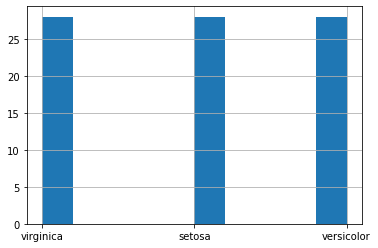

In [85]:
train.species_name.hist()

In [86]:
train.species_name.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species_name, dtype: int64

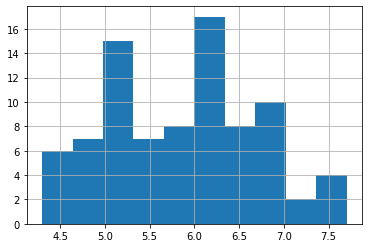

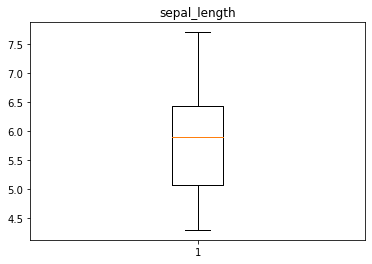

In [87]:
train.sepal_length.hist()
plt.show()
plt.title("sepal_length")
plt.boxplot(train.sepal_length)
plt.title("sepal_length")
plt.show()

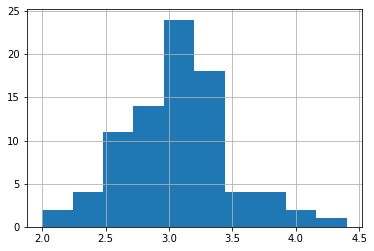

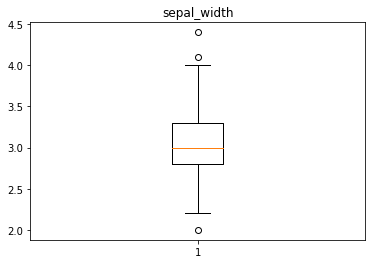

In [88]:
train.sepal_width.hist()
plt.show()
plt.title("sepal_width")
plt.boxplot(train.sepal_width)
plt.title("sepal_width")
plt.show()

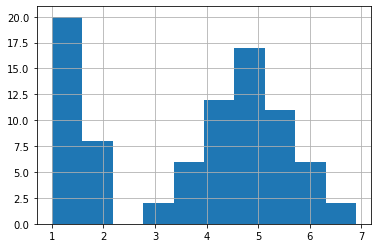

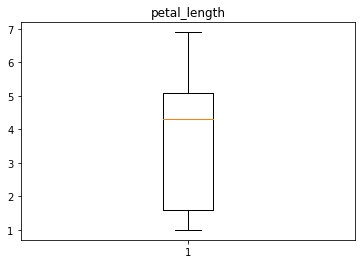

In [89]:
train.petal_length.hist()
plt.show()
plt.title("petal_length")
plt.boxplot(train.petal_length)
plt.title("petal_length")
plt.show()

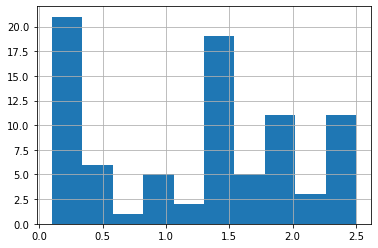

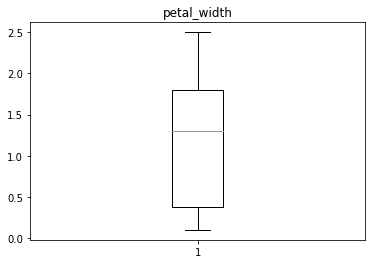

In [90]:
train.petal_width.hist()
plt.show()
plt.title("petal_width")
plt.boxplot(train.petal_width)
plt.title("petal_width")
plt.show()

Takeaways: 
    There are a normal distrbution on petal width. 

## For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

<AxesSubplot:>

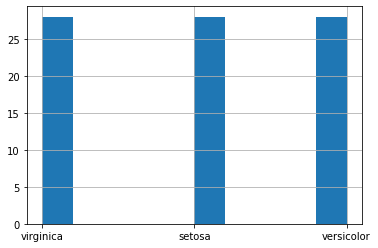

In [91]:
train.species_name.hist()

In [29]:
train.species_name.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species_name, dtype: int64

In [30]:
# I would like to futher investigate how petal width related with species. 

In [31]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_name'],
      dtype='object')

## Bivariate Stats

## Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

Text(0.5, 1.0, 'sepal length mean vs species')

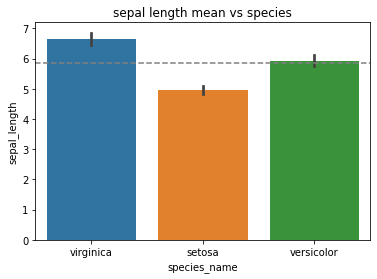

In [32]:
mean = train.sepal_length.mean()
sns.barplot(x = "species_name", y ='sepal_length', data = train)
plt.axhline(mean, ls='--', color='grey')
plt.title("sepal length mean vs species")

In [33]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_name'],
      dtype='object')

Text(0.5, 1.0, 'sepal width mean vs species')

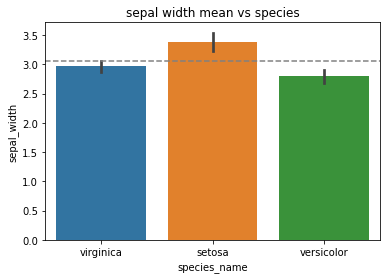

In [34]:
mean = train.sepal_width.mean()
sns.barplot(x = "species_name", y ='sepal_width', data = train)
plt.axhline(mean, ls='--', color='grey')
plt.title("sepal width mean vs species")

In [35]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_name'],
      dtype='object')

Text(0.5, 1.0, 'petal width mean vs species')

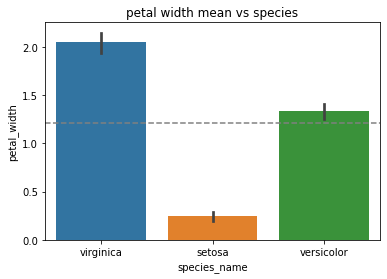

In [36]:
mean = train.petal_width.mean()
sns.barplot(x = "species_name", y ='petal_width', data = train)
plt.axhline(mean, ls='--', color='grey')
plt.title("petal width mean vs species")

In [37]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_name'],
      dtype='object')

Text(0.5, 1.0, 'petal length mean vs species')

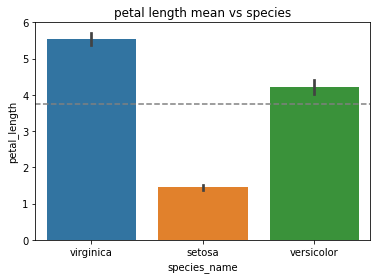

In [38]:
mean = train.petal_length.mean()
sns.barplot(x = "species_name", y ='petal_length', data = train)
plt.axhline(mean, ls='--', color='grey')
plt.title("petal length mean vs species")

## For each measurement type, compute the descriptive statistics for each species.

In [39]:
virginica_describe_sl = pd.DataFrame(train[train.species_name =="virginica"].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species_name == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species_name == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species_name == 'virginica'].petal_width.describe())


virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [40]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species_name == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species_name == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species_name == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species_name == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [41]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species_name == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species_name == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species_name == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species_name == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


## For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [42]:
versicolor = pd.DataFrame(train[train.species_name == 'versicolor'])
setosa = pd.DataFrame(train[train.species_name == 'setosa'])
virginica = pd.DataFrame(train[train.species_name =="virginica"])

In [43]:
# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [45]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
            
for feature in features: 
    t, p = stats.mannwhitneyu(virginica[feature], versicolor[feature], alternative="greater")
    print(f'This is the p and t for {feature}')
    print(t, p)
    print("--------------------------------")


This is the p and t for sepal_length
652.0 1.0119920315840621e-05
--------------------------------
This is the p and t for sepal_width
534.0 0.009508012794926874
--------------------------------
This is the p and t for petal_length
771.5 2.5253450566492905e-10
--------------------------------
This is the p and t for petal_width
768.5 2.982389808696449e-10
--------------------------------


Takeaways: petal_length and petal_width are making impact to species. 

## Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

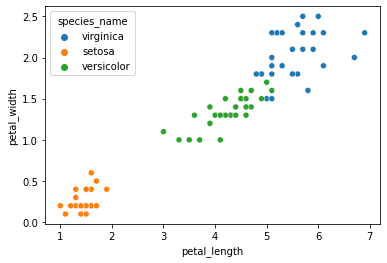

In [46]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x='petal_length', y='petal_width', hue='species_name', data=train)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

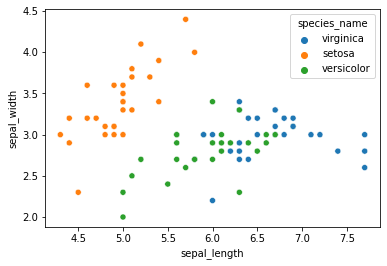

In [89]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species_name', data=train)
#sepal length and width is not that helpful as petal length and width. 

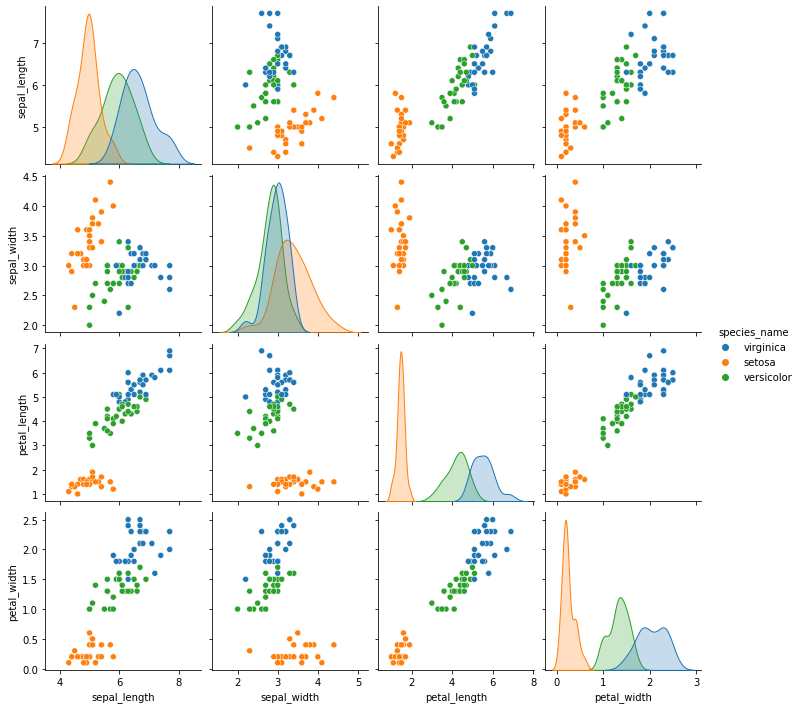

In [57]:
sns.pairplot(train, hue="species_name", corner = True)

### Takeaways: 
sepal length and width is not that helpful as petal length and width. 

## Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Swarmplot: Discrete x Continuous
A swarmplot can be used to plot a numeric variable with a discrete or categorical variable. Here we are looking at the relationship between class and age and adding the additional dimension of whether or not the passenger survived.

In [90]:
# melt the dataframe
train_melt = train.melt(id_vars='species_name',var_name = 'feature', value_name='length')
train_melt

,species_name,feature,length
0,virginica,sepal_length,6.00
1,setosa,sepal_length,5.00
2,versicolor,sepal_length,5.70
3,versicolor,sepal_length,6.40
4,versicolor,sepal_length,6.20
...,...,...,...
499,virginica,petal_area,11.73
500,versicolor,petal_area,5.98
501,versicolor,petal_area,5.46
502,virginica,petal_area,9.90


In [71]:
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']

In [73]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
138,6.0,3.0,4.8,1.8,virginica,18.00,8.64
7,5.0,3.4,1.5,0.2,setosa,17.00,0.30
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
74,6.4,2.9,4.3,1.3,versicolor,18.56,5.59
97,6.2,2.9,4.3,1.3,versicolor,17.98,5.59


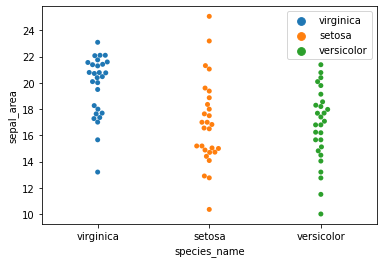

In [79]:
sns.swarmplot(x='species_name', y='sepal_area', data=train, hue='species_name')
plt.legend()
plt.show()

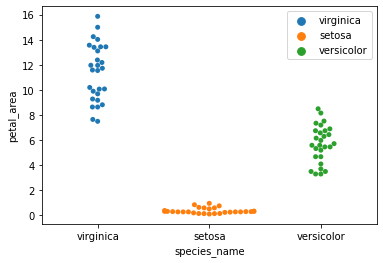

In [78]:
sns.swarmplot(x='species_name', y='petal_area', data=train, hue='species_name')
plt.legend()
plt.show()

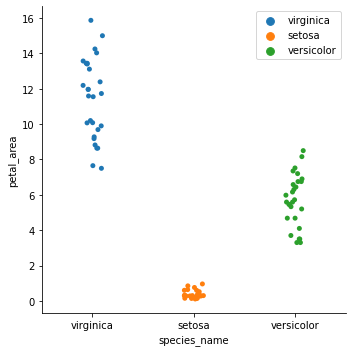

In [80]:
sns.catplot(x='species_name', y='petal_area', data=train, hue='species_name')
plt.legend()

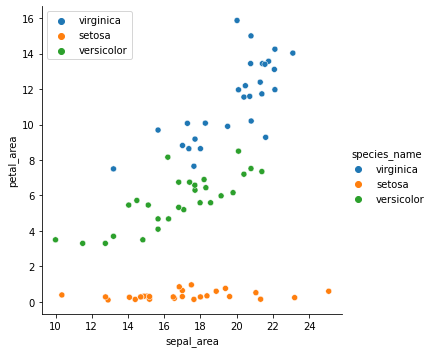

In [82]:
sns.relplot(x='sepal_area', y='petal_area', data=train, hue='species_name')
plt.legend()

## Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



## Is the sepal area signficantly different in virginica compared to setosa?

In [ ]:

# H0: The virginica sepal area == setosa sepal area. 
# Ha: The virginica sepal area != setosa sepal area. 

# alpha = 0.05
# If we have a p value of < 0.05, we can reject H0

In [84]:
versicolor = pd.DataFrame(train[train.species_name == 'versicolor'])
setosa = pd.DataFrame(train[train.species_name == 'setosa'])
virginica = pd.DataFrame(train[train.species_name =="virginica"])

In [86]:
versicolor['sepal_area']=versicolor['sepal_length'] * versicolor['sepal_width']
versicolor['petal_area']=versicolor['petal_length'] * versicolor['petal_width']

In [87]:
setosa['sepal_area']=setosa['sepal_length'] * setosa['sepal_width']
setosa['petal_area']=setosa['petal_length'] * setosa['petal_width']

In [88]:
t, p = stats.mannwhitneyu(virginica['sepal_area'], setosa['sepal_area'], alternative="greater")
print(t, p)
print("--------------------------------")

616.5 0.00012084768739795278
--------------------------------


## We reject the null, there is a difference between versicolor and setosa sepal area. 

# Exercises Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.


In [56]:
df = acquire.get_titanic_data()

Using cached csv


In [57]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [58]:
df = df.drop(columns=['passenger_id', 'sibsp', 'deck','sibsp','parch','class','embarked'])

In [59]:
df.head()

,survived,pclass,sex,age,fare,embark_town,alone
0,0,3,male,22.0,7.2500,Southampton,0
1,1,1,female,38.0,71.2833,Cherbourg,0
2,1,3,female,26.0,7.9250,Southampton,1
3,1,1,female,35.0,53.1000,Southampton,0
4,0,3,male,35.0,8.0500,Southampton,1


In [60]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, 
                               random_state=1349, stratify=df.survived)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, 
                                   random_state=1349, stratify=train.survived)


In [61]:
train.head()

,survived,pclass,sex,age,fare,embark_town,alone
474,0,3,female,22.0,9.8375,Southampton,1
370,1,1,male,25.0,55.4417,Cherbourg,0
573,1,3,female,NaN,7.7500,Queenstown,1
110,0,1,male,47.0,52.0000,Southampton,1
167,0,3,female,45.0,27.9000,Southampton,0


In [62]:
train.shape

(498, 7)

In [63]:
validate.shape

(214, 7)

In [64]:
test.shape

(179, 7)

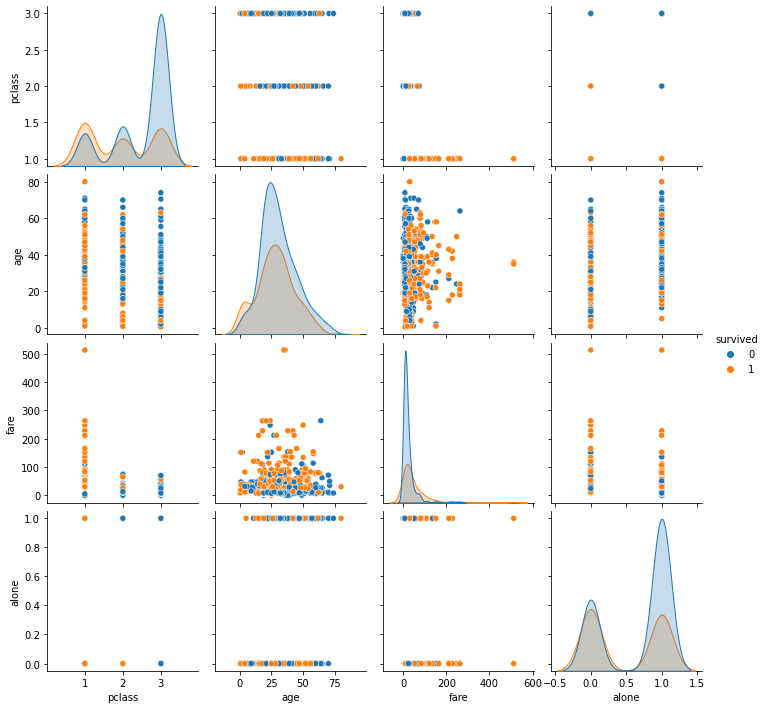

In [65]:
sns.pairplot(train, hue="survived")

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 474 to 94
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     498 non-null    int64  
 1   pclass       498 non-null    int64  
 2   sex          498 non-null    object 
 3   age          393 non-null    float64
 4   fare         498 non-null    float64
 5   embarked     496 non-null    object 
 6   embark_town  496 non-null    object 
 7   alone        498 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 35.0+ KB


In [66]:
train.groupby("sex")['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,174.0,0.752874,0.432586,0.0,1.0,1.0,1.0,1.0
male,324.0,0.185185,0.389049,0.0,0.0,0.0,0.0,1.0


In [67]:
train.groupby("pclass")['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,126.0,0.674603,0.470393,0.0,0.0,1.0,1.0,1.0
2,95.0,0.473684,0.501956,0.0,0.0,0.0,1.0,1.0
3,277.0,0.220217,0.415143,0.0,0.0,0.0,0.0,1.0


In [72]:
# dropped the columns that did not have enough information for us
# filled the values of our series with just a small amount of missing values
    # with the most frequent value 
train['embark_town'] = df.embark_town.fillna('Southampton')

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 474 to 94
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     498 non-null    int64  
 1   pclass       498 non-null    int64  
 2   sex          498 non-null    object 
 3   age          393 non-null    float64
 4   fare         498 non-null    float64
 5   embark_town  498 non-null    object 
 6   alone        498 non-null    int64  
 7   embark_to    498 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 35.0+ KB


### Univariate Exploration:
One variable exploration:
Things we do with a single Series: Box/Whisker plots, histograms, value_counts
### Bivariate Exploration:
Comparing one variable to another (our target)
scatter plots, bar charts, etc
### Multivariate Exploration:
Just like the last one, but more (think extra dimensions like hue, size, etc)


### Barplots
Here we'll treat survived as a number and explore its interactions with other categorical features. 

Text(0.5, 1.0, 'fare vs class')

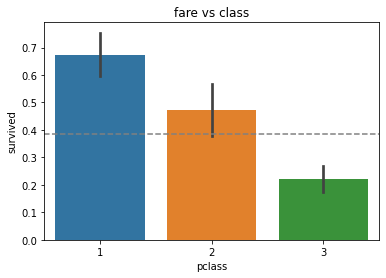

In [81]:
mean = train.survived.mean()

sns.barplot(x = "pclass", y ='survived', data = train)

plt.axhline(mean, ls='--', color='grey')

plt.title("fare vs class")

## Continuous vs. Continuous
Use a .scatterplot
Try a .regplot

<AxesSubplot:xlabel='fare', ylabel='age'>

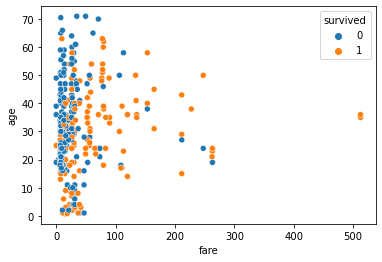

In [85]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x='fare', y='age', hue='survived', data=train)

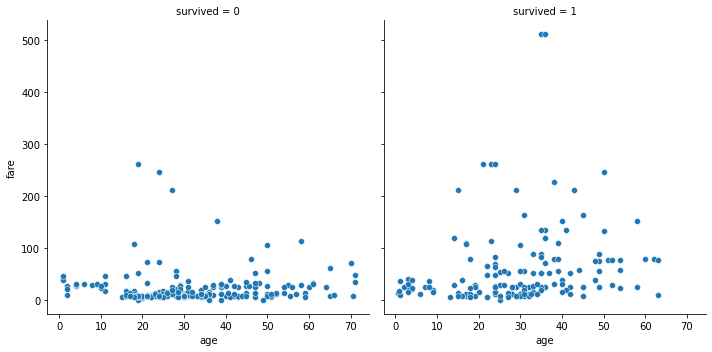

In [86]:
# col argument is a discrete variable feature in our dataset
sns.relplot(x='age', y='fare', col='survived', data=train)

## Swarmplot: Discrete x Continuous
A swarmplot can be used to plot a numeric variable with a discrete or categorical variable. Here we are looking at the relationship between class and age and adding the additional dimension of whether or not the passenger survived.



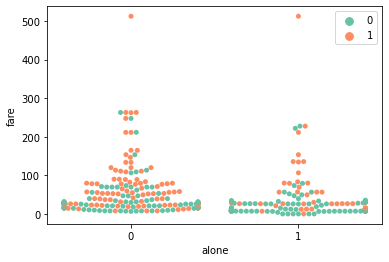

In [88]:
sns.swarmplot(x='alone', y='fare', data=train, hue='survived', palette='Set2')
plt.legend()
plt.show()

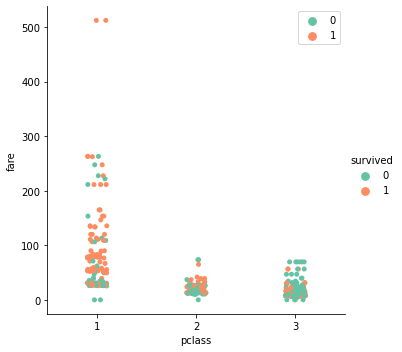

In [91]:
sns.catplot(x='pclass', y='fare', data=train, hue='survived', palette='Set2')
plt.legend()
plt.show()

## Fare are too spread out, I will develop some bins to make it categorical data. 

In [119]:
train.describe()

,survived,pclass,age,fare,alone
count,498.000000,498.000000,393.000000,498.000000,498.000000
mean,0.383534,2.303213,30.539440,34.345013,0.606426
std,0.486735,0.847787,14.399416,54.116433,0.489034
min,0.000000,1.000000,0.670000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,7.895800,0.000000
50%,0.000000,3.000000,29.000000,14.458300,1.000000
75%,1.000000,3.000000,39.000000,31.275000,1.000000
max,1.000000,3.000000,71.000000,512.329200,1.000000


In [120]:
train['fare'].min()

0.0

In [121]:
fare_bins = np.linspace(train['fare'].min(),train['fare'].max(),5)
fare_bins

fare_bins = np.array([0, 20, 300, 600])
labels = ["low", 'mid', 'high']

train["fare_level"] = pd.cut(train['fare'], bins=fare_bins, labels=labels, include_lowest=True)


array([  0.    , 128.0823, 256.1646, 384.2469, 512.3292])

In [139]:
train.head()

,survived,pclass,sex,age,fare,embark_town,alone,embark_to,fare_level
474,0,3,female,22.0,9.8375,Southampton,1,Southampton,low
370,1,1,male,25.0,55.4417,Cherbourg,0,Cherbourg,mid
573,1,3,female,NaN,7.7500,Queenstown,1,Queenstown,low
110,0,1,male,47.0,52.0000,Southampton,1,Southampton,mid
167,0,3,female,45.0,27.9000,Southampton,0,Southampton,mid


Text(0.5, 1.0, 'fare_level vs survived_rate')

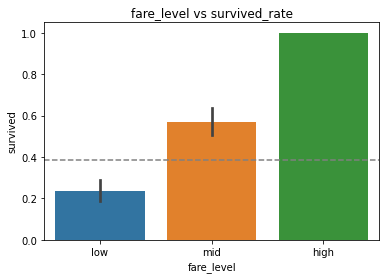

In [140]:
mean = train.survived.mean()

sns.barplot(x = "fare_level", y ='survived', data = train)

plt.axhline(mean, ls='--', color='grey')

plt.title("fare_level vs survived_rate")

In [141]:
train.groupby("fare_level")['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
fare_level,,,,,,,,
low,282.0,0.237589,0.426362,0.0,0.0,0.0,0.0,1.0
mid,214.0,0.570093,0.496223,0.0,0.0,1.0,1.0,1.0
high,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [142]:
train.fare.describe()

count    498.000000
mean      34.345013
std       54.116433
min        0.000000
25%        7.895800
50%       14.458300
75%       31.275000
max      512.329200
Name: fare, dtype: float64

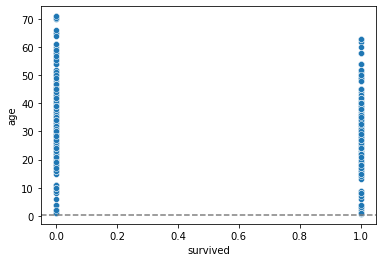

In [145]:
mean = train.survived.mean()

sns.scatterplot(x = "survived", y ='age', data = train)

plt.axhline(mean, ls='--', color='grey')


## Crosstab: Discrete x Discrete

In [112]:

pd.crosstab(train.fare_level, train.survived, margins=True).reset_index()

survived,fare_level,0,1,All
0,low,302,181,483
1,mid,5,8,13
2,high,0,2,2
3,All,307,191,498


## Takeaways: 
    There is no need to futher investigate the relationship between fare rate and surivial rate, 50% of them were paid under $14. 

## Study on the relationship between gender and survivial rate

In [157]:
train.groupby("sex")['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,174.0,0.752874,0.432586,0.0,1.0,1.0,1.0,1.0
male,324.0,0.185185,0.389049,0.0,0.0,0.0,0.0,1.0


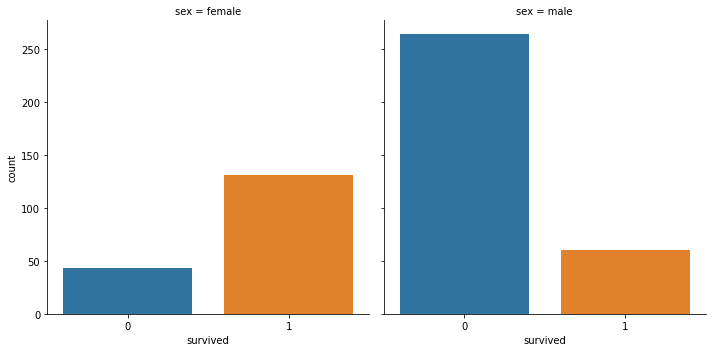

In [158]:
sns.catplot(x='survived', col='sex', data=train, kind='count')
plt.show()

In [159]:

pd.crosstab(train.sex, train.survived, margins=True).reset_index()

survived,sex,0,1,All
0,female,43,131,174
1,male,264,60,324
2,All,307,191,498


## Statistical Testing


In [160]:
# survived vs Sex:
# H0: Sex is independent of Survival
# Ha: Sex is not independent of Survival

In [164]:
pd.crosstab(train.sex, train.survived, margins=True).reset_index()


survived,sex,0,1,All
0,female,43,131,174
1,male,264,60,324
2,All,307,191,498


In [165]:
observed = pd.crosstab(train.sex, train.survived)

stats.chi2_contingency(observed)

## We can reject the null hypothesis that there is independence between class and surival, bolstering what we observed visually with statistical significance

## Exercises Part III
## Explore your telco data to discover drivers of churn


In [39]:
df = acquire.get_telco_data()

Using cached csv


In [40]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [41]:
df = df.drop(columns=['payment_type_id', 'contract_type_id', 'customer_id', 
                      'internet_service_type_id'
                     ])

In [42]:
df.churn = df[['churn']].replace({"Yes":1, "No":0})

In [43]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,0,DSL,One year,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,0,DSL,Month-to-month,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,1,Fiber optic,Month-to-month,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,1,Fiber optic,Month-to-month,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,1,Fiber optic,Month-to-month,Mailed check


In [44]:
from sklearn.model_selection import train_test_split
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.churn)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.churn)


In [45]:
train.describe()

,senior_citizen,tenure,monthly_charges,churn
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.158002,32.223180,64.600900,0.265280
std,0.364789,24.531767,30.159764,0.441538
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.575000,0.000000
50%,0.000000,28.000000,70.050000,0.000000
75%,0.000000,55.000000,89.800000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [46]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
6832,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,No,No,Yes,Yes,No,99.00,5969.3,0,Fiber optic,One year,Electronic check
433,Male,0,Yes,No,40,Yes,Yes,No,Yes,No,Yes,Yes,No,No,70.75,2921.75,0,DSL,One year,Credit card (automatic)
25,Female,0,Yes,Yes,1,No,No phone service,Yes,No,No,No,No,No,No,30.50,30.5,1,DSL,Month-to-month,Bank transfer (automatic)
3196,Female,0,No,No,13,No,No phone service,No,No,Yes,No,Yes,Yes,No,49.15,649.4,0,DSL,Month-to-month,Electronic check
4466,Female,0,Yes,No,70,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,110.50,7752.05,0,Fiber optic,Two year,Electronic check


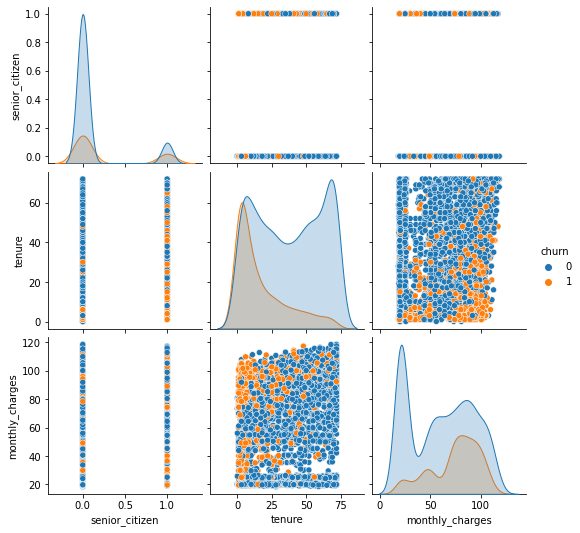

In [47]:
sns.pairplot(train, hue="churn")

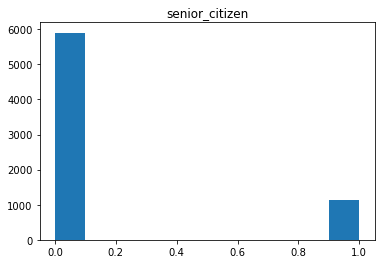

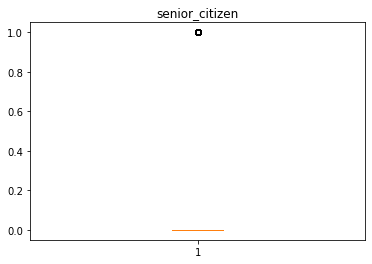

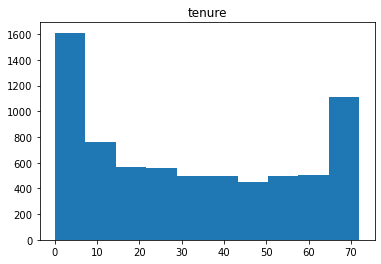

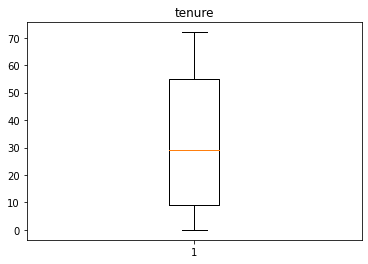

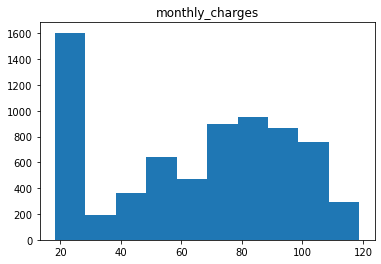

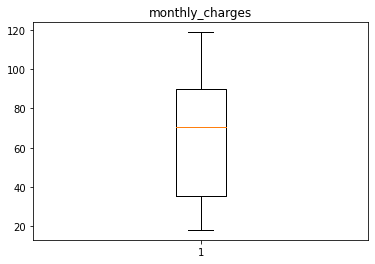

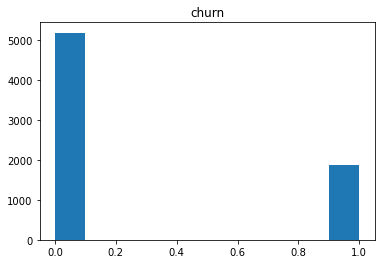

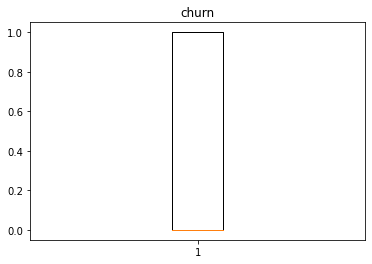

In [48]:
# Plot numeric columns
num_cols = df.columns[[(df[col].dtype == 'int64') or (df[col].dtype == 'float64') for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

## First, I would like to investigate how payment type impact the churn rate. 

In [49]:
pd.crosstab(train.payment_type, train.churn, margins=True).reset_index()


churn,payment_type,0,1,All
0,Bank transfer (automatic),722,130,852
1,Credit card (automatic),725,132,857
2,Electronic check,683,614,1297
3,Mailed check,767,170,937
4,All,2897,1046,3943


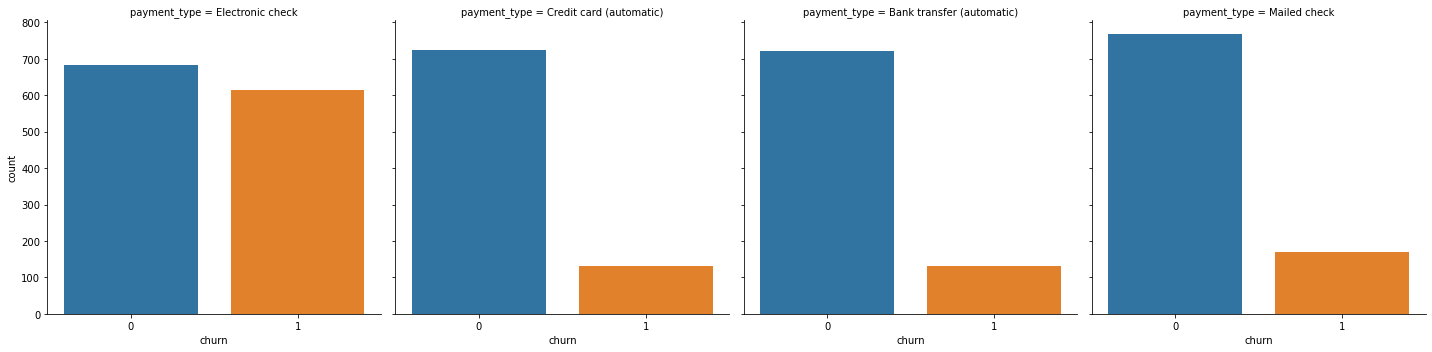

In [50]:
sns.catplot(x='churn', col='payment_type', data=train, kind='count')
plt.show()

### Statistical Testing

In [51]:
# survived vs Sex:
# H0: Payment type is independent of churn rate
# Ha: Payment type is not independent of churn rate

# OR 

# H0: There is no relationship between payment type and churn rate.
# H1: There are relationship between payment type and churn rate. 

In [52]:
observed = pd.crosstab(train.payment_type, train.churn)

stats.chi2_contingency(observed)

(431.9747517541082,
 2.621474522548968e-93,
 3,
 array([[625.98123256, 226.01876744],
        [629.65483135, 227.34516865],
        [952.93152422, 344.06847578],
        [688.43241187, 248.56758813]]))

## We can reject the null that there is no relationship between payment type and churn rate. 

## Second, I would like to further investigate how monthly charges related with churn rate by put them in bins. 

Text(0.5, 1.0, 'Churn Rate vs Monthly charges')

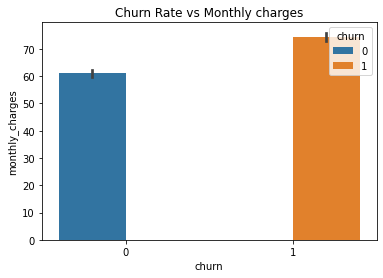

In [58]:
sns.barplot(x='churn', y='monthly_charges', hue='churn', data=train)
plt.title("Churn Rate vs Monthly charges")


In [59]:
train.monthly_charges.describe()

count    3943.000000
mean       64.600900
std        30.159764
min        18.250000
25%        35.575000
50%        70.050000
75%        89.800000
max       118.750000
Name: monthly_charges, dtype: float64

In [60]:
monthly_charges_bins = np.linspace(train['monthly_charges'].min(),train['monthly_charges'].max(),5)
monthly_charges_bins

monthly_charges_bins = np.array([0, 40, 80, 120])
labels = ["low", 'mid', 'high']

train["monthly_charges_level"] = pd.cut(train['monthly_charges'], bins=monthly_charges_bins, labels=labels, include_lowest=True)


In [61]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,monthly_charges_level
6832,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,No,...,Yes,Yes,No,99.00,5969.3,0,Fiber optic,One year,Electronic check,high
433,Male,0,Yes,No,40,Yes,Yes,No,Yes,No,...,Yes,No,No,70.75,2921.75,0,DSL,One year,Credit card (automatic),mid
25,Female,0,Yes,Yes,1,No,No phone service,Yes,No,No,...,No,No,No,30.50,30.5,1,DSL,Month-to-month,Bank transfer (automatic),low
3196,Female,0,No,No,13,No,No phone service,No,No,Yes,...,Yes,Yes,No,49.15,649.4,0,DSL,Month-to-month,Electronic check,mid
4466,Female,0,Yes,No,70,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,110.50,7752.05,0,Fiber optic,Two year,Electronic check,high


In [62]:
pd.crosstab(train.monthly_charges_level, train.churn, margins=True).reset_index()


churn,monthly_charges_level,0,1,All
0,low,918,113,1031
1,mid,999,426,1425
2,high,980,507,1487
3,All,2897,1046,3943


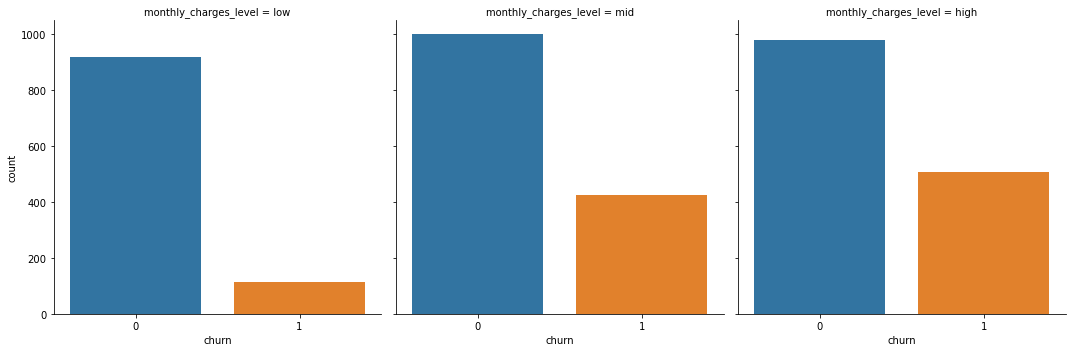

In [63]:
sns.catplot(x='churn', col='monthly_charges_level', data=train, kind='count')
plt.show()

In [64]:
train.groupby("monthly_charges_level")['churn'].describe()

,count,mean,std,min,25%,50%,75%,max
monthly_charges_level,,,,,,,,
low,1031.0,0.109602,0.312545,0.0,0.0,0.0,0.0,1.0
mid,1425.0,0.298947,0.457957,0.0,0.0,0.0,1.0,1.0
high,1487.0,0.340955,0.474190,0.0,0.0,0.0,1.0,1.0


### Statstical Testing

In [69]:
# churn vs monthly charges:
#H0: monthly charges is independent of churn rate
#Ha: monthly charges is not independent of churn rate

# OR 

# H0: There is no relationship between monthly charges and churn rate.
# H1: There are relationship between monthly charges and churn rate. 

In [70]:
corr, p = stats.pearsonr(train.monthly_charges, train.churn)


corr, p

(0.19791461428411738, 4.0722361565042875e-36)

# BACK TO IRIS 

In [92]:
import itertools

In [94]:
list(itertools.combinations(train.drop(columns='species_name').columns, 2))
# Find all the columns combination. 

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('petal_length', 'petal_width')]

In [95]:
# define feature combinations with a list of tuples,just a small example from the itertool up there. 
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [96]:
combos[0]

('sepal_length', 'sepal_width')

In [99]:
# we can use aggretations to examine specific stats on our categorical target
train.groupby('species_name')['sepal_width'].sum()

species_name
setosa        94.8
versicolor    78.4
virginica     83.3
Name: sepal_width, dtype: float64

In [100]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species_name'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

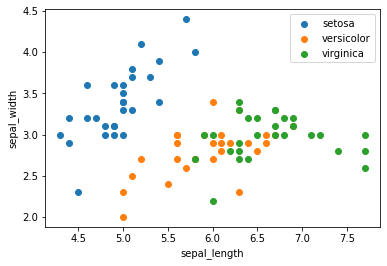

In [101]:
scatter_species(x,y)

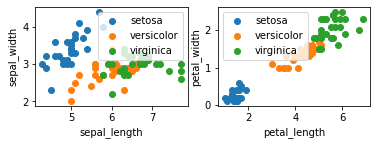

In [103]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
# So we can view all other combination charts. 

sepal_length is useful, sepal_width not great but likely adds some value.
petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.